**Chapter 1: Literature review**

In [ ]:
import os

In [ ]:
pip install pdfminer.six

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.9 MB/s eta 0:00:00


In [ ]:
pip install pyldavis gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 6.3 MB/s eta 0:00:00


In [ ]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice

from pdfminer.pdfpage import PDFTextExtractionNotAllowed
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from pdfminer.converter import PDFPageAggregator

import gensim
from nltk.corpus import stopwords
import spacy
import gensim.corpora as corpora

import pyLDAvis.gensim
import pickle
from pygam import LinearGAM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/University of Vaasa/Subjects/Python/Big data group project/papers'

# Check if the directory exists
if os.path.exists(data_path):
    # List files in the directory
    files = os.listdir(data_path)
    print("Files in directory:")
    for file in files:
        print(file)
else:
    print("Directory does not exist:", data_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Files in directory:
Donovan et al. - 2021 - Measuring credit risk using qualitative disclosure.pdf
Zhang et al. - 2023 - An explainable financial risk early warning model based on the DS-XGBoost model.pdf
Jones - 2017 - Corporate bankruptcy prediction a high dimensiona.pdf
Hosaka - 2019 - Bankruptcy prediction using imaged financial ratio.pdf
Mai et al. - 2019 - Deep learning models for bankruptcy prediction usi.pdf
Iturriaga et al.- 2015 - Bankruptcy visualization and prediction using neural networks A study of U.S. commercial bankspdf.pdf
Erdogan - 2013 - Prediction of bankruptcy using support vector machines  an application to bank bankruptcy.pdf
López-Iturriaga et al. - 2010- Predicting bankruptcy using neural networks in the current financial crisis A study of US commercial banks .pdf
Domician et al. - 2023 - Comparative Analysis of Machine Learning Models for Bankruptcy Prediction in the Context of Pakistani Companies.pdf
Qu et al. - 2019 - Review of bankruptcy prediction using 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Donovan et al. - 2021 - Measuring credit risk using qualitative disclosure.pdf'

In [ ]:
len(files)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50

In [ ]:
files = os.listdir(data_path)
" | ".join(files[0:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Donovan et al. - 2021 - Measuring credit risk using qualitative disclosure.pdf | Zhang et al. - 2023 - An explainable financial risk early warning model based on the DS-XGBoost model.pdf | Jones - 2017 - Corporate bankruptcy prediction a high dimensiona.pdf | Hosaka - 2019 - Bankruptcy prediction using imaged financial ratio.pdf | Mai et al. - 2019 - Deep learning models for bankruptcy prediction usi.pdf | Iturriaga et al.- 2015 - Bankruptcy visualization and prediction using neural networks A study of U.S. commercial bankspdf.pdf | Erdogan - 2013 - Prediction of bankruptcy using support vector machines  an application to bank bankruptcy.pdf | López-Iturriaga et al. - 2010- Predicting bankruptcy using neural networks in the current financial crisis A study of US commercial banks .pdf | Domician et al. - 2023 - Comparative Analysis of Machine Learning Models for Bankruptcy Prediction in the Context of Pakistani Companies.pdf | Qu et al. - 2019 - Review of bankruptcy prediction using m

In [ ]:
def convert_pdfminer(fname): #stripping the text from PDF files
        fp = open(fname, 'rb')
        parser = PDFParser(fp)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        text = ''
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)
            layout = device.get_result()
            for lt_obj in layout:
                if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                    text += lt_obj.get_text()
        return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.corpus import stopwords #this is the process of importing stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words("english")


additional_stopwords = ['ieee', 'cid', 'et', 'al', 'pp', 'vol', 'fig', 'reproduction', 'prohibited', 'reproduced', 'permission','https_org']
stop_words.extend(additional_stopwords)

stop_words_string = " | ".join(stop_words)
print(stop_words_string)


i | me | my | myself | we | our | ours | ourselves | you | you're | you've | you'll | you'd | your | yours | yourself | yourselves | he | him | his | himself | she | she's | her | hers | herself | it | it's | its | itself | they | them | their | theirs | themselves | what | which | who | whom | this | that | that'll | these | those | am | is | are | was | were | be | been | being | have | has | had | having | do | does | did | doing | a | an | the | and | but | if | or | because | as | until | while | of | at | by | for | with | about | against | between | into | through | during | before | after | above | below | to | from | up | down | in | out | on | off | over | under | again | further | then | once | here | there | when | where | why | how | all | any | both | each | few | more | most | other | some | such | no | nor | not | only | own | same | so | than | too | very | s | t | can | will | just | don | don't | should | should've | now | d | ll | m | o | re | ve | y | ain | aren | 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words("english")
stop_words.extend(['ieee','cid','et','al','pp','vol','fig','reproduction','prohibited','reproduced','permission','doi','https_org'])
" | ".join(stop_words) #double checked to ensure that the stopwords are working

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"i | me | my | myself | we | our | ours | ourselves | you | you're | you've | you'll | you'd | your | yours | yourself | yourselves | he | him | his | himself | she | she's | her | hers | herself | it | it's | its | itself | they | them | their | theirs | themselves | what | which | who | whom | this | that | that'll | these | those | am | is | are | was | were | be | been | being | have | has | had | having | do | does | did | doing | a | an | the | and | but | if | or | because | as | until | while | of | at | by | for | with | about | against | between | into | through | during | before | after | above | below | to | from | up | down | in | out | on | off | over | under | again | further | then | once | here | there | when | where | why | how | all | any | both | each | few | more | most | other | some | such | no | nor | not | only | own | same | so | than | too | very | s | t | can | will | just | don | don't | should | should've | now | d | ll | m | o | re | ve | y | ain | aren |

In [ ]:
file_years = [re.findall(r'\d+',name)[0] for name in files]
" | ".join(file_years)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2021 | 2023 | 2017 | 2019 | 2019 | 2015 | 2013 | 2010 | 2023 | 2019 | 2022 | 2017 | 2023 | 2023 | 2021 | 2024 | 2022 | 2023 | 2020 | 2022 | 2023 | 2021 | 2024 | 2022 | 2023 | 2021 | 2021 | 2022 | 2020 | 2020 | 2024 | 2022 | 2020 | 2020 | 2022 | 2020 | 2021 | 2021 | 2021 | 2020 | 2021 | 2022 | 2022 | 2021 | 2022 | 2023 | 2020 | 2022 | 2020 | 2022'

In [ ]:
import os

# Define the path in Google Colab environment
data_path = '/content/drive/MyDrive/University of Vaasa/Subjects/Python/Big data group project/papers'

# List files in the directory
files = os.listdir(data_path)

raw_text = []
for file in files:
    if file.endswith('.pdf'):
        file_path = os.path.join(data_path, file)
        temp1 = convert_pdfminer(file_path)
        raw_text.append(temp1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
raw_text[0][0:1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Review of Accounting Studies\nhttps://doi.org/10.1007/s11142-020-09575-4\nMeasuring credit risk using qualitative disclosure\nJohn Donovan 1 & Jared Jennings 2\n& Kevin Koharki 3 & Joshua Lee 4\nAccepted: 11 December 2020/\n# The Author(s), under exclusive licence to Springer Science+Business Media, LLC part of Springer Nature 2021\nAbstract\nWe use machine learning methods to create a comprehensive measure of credit risk\nbased on qualitative information disclosed in conference calls and in management’s\ndiscussion and analysis section of the 10-K. In out-of-sample tests, we find that our\nmeasure improves the ability to predict credit events (bankruptcies, interest spreads,\nand credit rating downgrades), relative to credit risk measures developed by prior\nresearch (e.g., z-score). We also find our measure based on conference calls explains\nwithin-firm variation in future credit events; however, we find little evidence that the\nmeasures of credit risk developed by prior research 

In [ ]:
docs_cleaned = []
for item in raw_text:
    tokens = gensim.utils.simple_preprocess(item)
    docs_cleaned.append(tokens)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
" | ".join(docs_cleaned[0][0:200])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'review | of | accounting | studies | https | doi | org | measuring | credit | risk | using | qualitative | disclosure | john | donovan | jared | jennings | kevin | koharki | joshua | lee | accepted | december | the | author | under | exclusive | licence | to | springer | science | business | media | llc | part | of | springer | nature | abstract | we | use | machine | learning | methods | to | create | comprehensive | measure | of | credit | risk | based | on | qualitative | information | disclosed | in | conference | calls | and | in | management | discussion | and | analysis | section | of | the | in | out | of | sample | tests | we | find | that | our | measure | improves | the | ability | to | predict | credit | events | bankruptcies | interest | spreads | and | credit | rating | downgrades | relative | to | credit | risk | measures | developed | by | prior | research | score | we | also | find | our | measure | based | on | conference | calls | explains | within | firm | variatio

In [ ]:
docs_nostops = []
for item in docs_cleaned:
    red_tokens = [word for word in item if word not in stop_words]
    docs_nostops.append(red_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
" | ".join(docs_nostops[0][0:200])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'review | accounting | studies | https | org | measuring | credit | risk | using | qualitative | disclosure | john | donovan | jared | jennings | kevin | koharki | joshua | lee | accepted | december | author | exclusive | licence | springer | science | business | media | llc | part | springer | nature | abstract | use | machine | learning | methods | create | comprehensive | measure | credit | risk | based | qualitative | information | disclosed | conference | calls | management | discussion | analysis | section | sample | tests | find | measure | improves | ability | predict | credit | events | bankruptcies | interest | spreads | credit | rating | downgrades | relative | credit | risk | measures | developed | prior | research | score | also | find | measure | based | conference | calls | explains | within | firm | variation | future | credit | events | however | find | little | evidence | measures | credit | risk | developed | prior | research | explain | within | firm | variation | c

In [ ]:
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install -U spacy
!pip install -U spacy-legacy
!pip install -U https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz #installing spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) #using the sm model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
docs_lemmas = []
for red_tokens in docs_nostops:
    doc = nlp(" ".join(red_tokens))
    docs_lemmas.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
" | ".join(docs_lemmas[0][0:200])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'review | accounting | study | measure | credit | risk | use | qualitative | disclosure | accept | author | exclusive | licence | springer | business | medium | part | springer | nature | abstract | use | machine | learning | method | create | comprehensive | measure | credit | risk | base | qualitative | information | disclose | conference | call | management | discussion | analysis | section | sample | test | find | measure | improve | ability | predict | credit | event | bankruptcie | interest | spread | credit | rating | downgrade | relative | credit | risk | measure | develop | prior | research | score | also | find | measure | base | conference | call | explain | firm | variation | future | credit | event | however | find | little | evidence | measure | credit | risk | develop | prior | research | explain | firm | variation | credit | risk | measure | utility | academic | practitioner | majority | firm | readily | available | measure | credit | risk | actively | trade | cds | cre

In [ ]:
bigram = gensim.models.Phrases(docs_lemmas,threshold=100, min_count=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
docs_bigrams = [bigram_mod[doc] for doc in docs_lemmas]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
" | ".join(docs_bigrams[0][200:300])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'advance | compute | technology | allow | researcher | begin | explore | usefulness | qualitative | information | firm | disclosure | example | mayew | use | dictionary | approach | provide | evidence | language | question | firm | ability | continue | go_concern | management | discussion | analysis | predict | bankruptcy | introduce | supervised | machine | learn | technology | stream | research | alternative | mean | extract | credit | risk | information | qualitative_disclosure | supervise | machine | learning | model | add | significant | explanatory | power | credit | risk | measure | use | computer | algorithm | identify | pattern | disclosure | researcher | overlook | use | model | create | comprehensive | mea_sure | credit | risk | use | qualitative | information | contain | firm | level | disclosure | earning | conference_call | section | annual_report | find | measure | add | significant | explanatory | power | measure | credit | risk | relative | incremental | measure | exam

In [ ]:
id2word = corpora.Dictionary(docs_bigrams)
id2word.filter_extremes(no_below=3, no_above=0.9, keep_n=100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word.token2id['bankrupt']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


82

In [ ]:
corpus = [id2word.doc2bow(text) for text in docs_bigrams]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word.doc2bow(docs_bigrams[0])[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1),
 (1, 30),
 (2, 5),
 (3, 1),
 (4, 8),
 (5, 2),
 (6, 4),
 (7, 1),
 (8, 50),
 (9, 4)]

In [ ]:
id2word[2],id2word[9]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('abnormal', 'accrual')

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, #I am choosing 5 topics in building the LDA model
                                           random_state=100,
                                           update_every=1,
                                           chunksize=60,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            eta = 'auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.011*"class" + 0.009*"ﬁnancial" + 0.006*"deep" + 0.006*"bankrupt" + 0.006*"ensemble" + 0.005*"dataset" + 0.005*"neural_network" + 0.005*"imbalance" + 0.004*"word" + 0.004*"expert_system"'),
 (1,
  '0.016*"cluster" + 0.014*"dataset" + 0.013*"mean" + 0.010*"firm" + 0.010*"annual_report" + 0.010*"error" + 0.009*"instance" + 0.008*"classification" + 0.007*"input" + 0.007*"classifier"'),
 (2,
  '0.011*"firm" + 0.009*"asset" + 0.008*"default" + 0.007*"bankrupt" + 0.007*"neural_network" + 0.006*"classification" + 0.006*"sector" + 0.005*"factor" + 0.005*"sme" + 0.004*"error"'),
 (3,
  '0.009*"default" + 0.008*"ﬁnancial" + 0.008*"dataset" + 0.007*"ﬁrm" + 0.007*"asset" + 0.006*"measure" + 0.006*"neural_network" + 0.006*"random_forest" + 0.005*"importance" + 0.005*"fail"'),
 (4,
  '0.031*"firm" + 0.017*"measure" + 0.011*"accounting" + 0.010*"bankrupt" + 0.008*"asset" + 0.008*"survival" + 0.008*"advertising" + 0.008*"score" + 0.007*"increase" + 0.007*"price"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.032141 -0.011996       1        1  28.760830
2     -0.007959 -0.026653       2        1  24.443780
0      0.060043 -0.056419       3        1  19.745067
4     -0.144412  0.010561       4        1  15.593507
1      0.060187  0.084506       5        1  11.456816, topic_info=                     Term         Freq        Total Category  logprob  loglift
339                  firm  1314.000000  1314.000000  Default  30.0000  30.0000
131               cluster   339.000000   339.000000  Default  29.0000  29.0000
1297              dataset   704.000000   704.000000  Default  28.0000  28.0000
48          annual_report   172.000000   172.000000  Default  27.0000  27.0000
519                  mean   455.000000   455.000000  Default  26.0000  26.0000
...                   ...          ...          ...      ...      ...      ...
754                  sale    56.325540   288.768479   Topic5  -5.5609   0.5321
1056  logistic_regression    59.922496   395.403025   Topic5  -5.4990   0.2797
760                 score    60.123498   466.570947   Topic5  -5.4957   0.1176
683         random_forest    58.979503   456.548847   Topic5  -5.5149   0.1201
939                   auc    54.794417   385.013854   Topic5  -5.5885   0.2169

[410 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.870083         aaa
8         1  0.148503  accounting
8         2  0.132228  accounting
8         3  0.193257  accounting
8         4  0.453645  accounting
...     ...       ...         ...
2084      1  0.713270        ﬁrst
2084      2  0.086984        ﬁrst
2084      3  0.173968        ﬁrst
2084      5  0.017397        ﬁrst
2598      1  0.886870      ﬁtting

[1103 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])

In [ ]:
top_words_df = pd.DataFrame()
for i in range(5):
    temp_words = lda_model.show_topic(i,10)
    just_words = [name for (name,_) in temp_words]
    top_words_df['Topic ' + str(i+1)] = just_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_words_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,class,cluster,firm,default,firm
1,ﬁnancial,dataset,asset,ﬁnancial,measure
2,deep,mean,default,dataset,accounting
3,bankrupt,firm,bankrupt,ﬁrm,bankrupt
4,ensemble,annual_report,neural_network,asset,asset
5,dataset,error,classification,measure,survival
6,neural_network,instance,sector,neural_network,advertising
7,imbalance,classification,factor,random_forest,score
8,word,input,sme,importance,increase
9,expert_system,classifier,error,fail,price


In [ ]:
evolution = np.zeros([50,5])
ind = 0
for bow in corpus:
    topics = lda_model.get_document_topics(bow)
    for topic in topics:
        evolution[ind,topic[0]] = topic[1]
    ind+=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
evolution_df = pd.DataFrame(evolution,columns = ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5'])
evolution_df['Year'] = file_years
evolution_df['Date'] = pd.to_datetime(evolution_df['Year'])
evolution_df.set_index('Date',inplace=True)
evolution_df.drop('Year',axis=1,inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

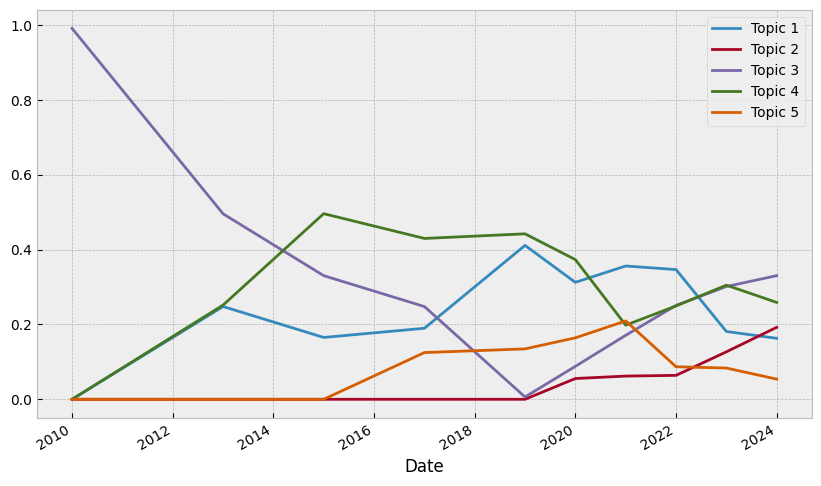

In [ ]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (10, 6)
evolution_df.groupby('Date').mean().rolling(4,min_periods=1).mean().plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


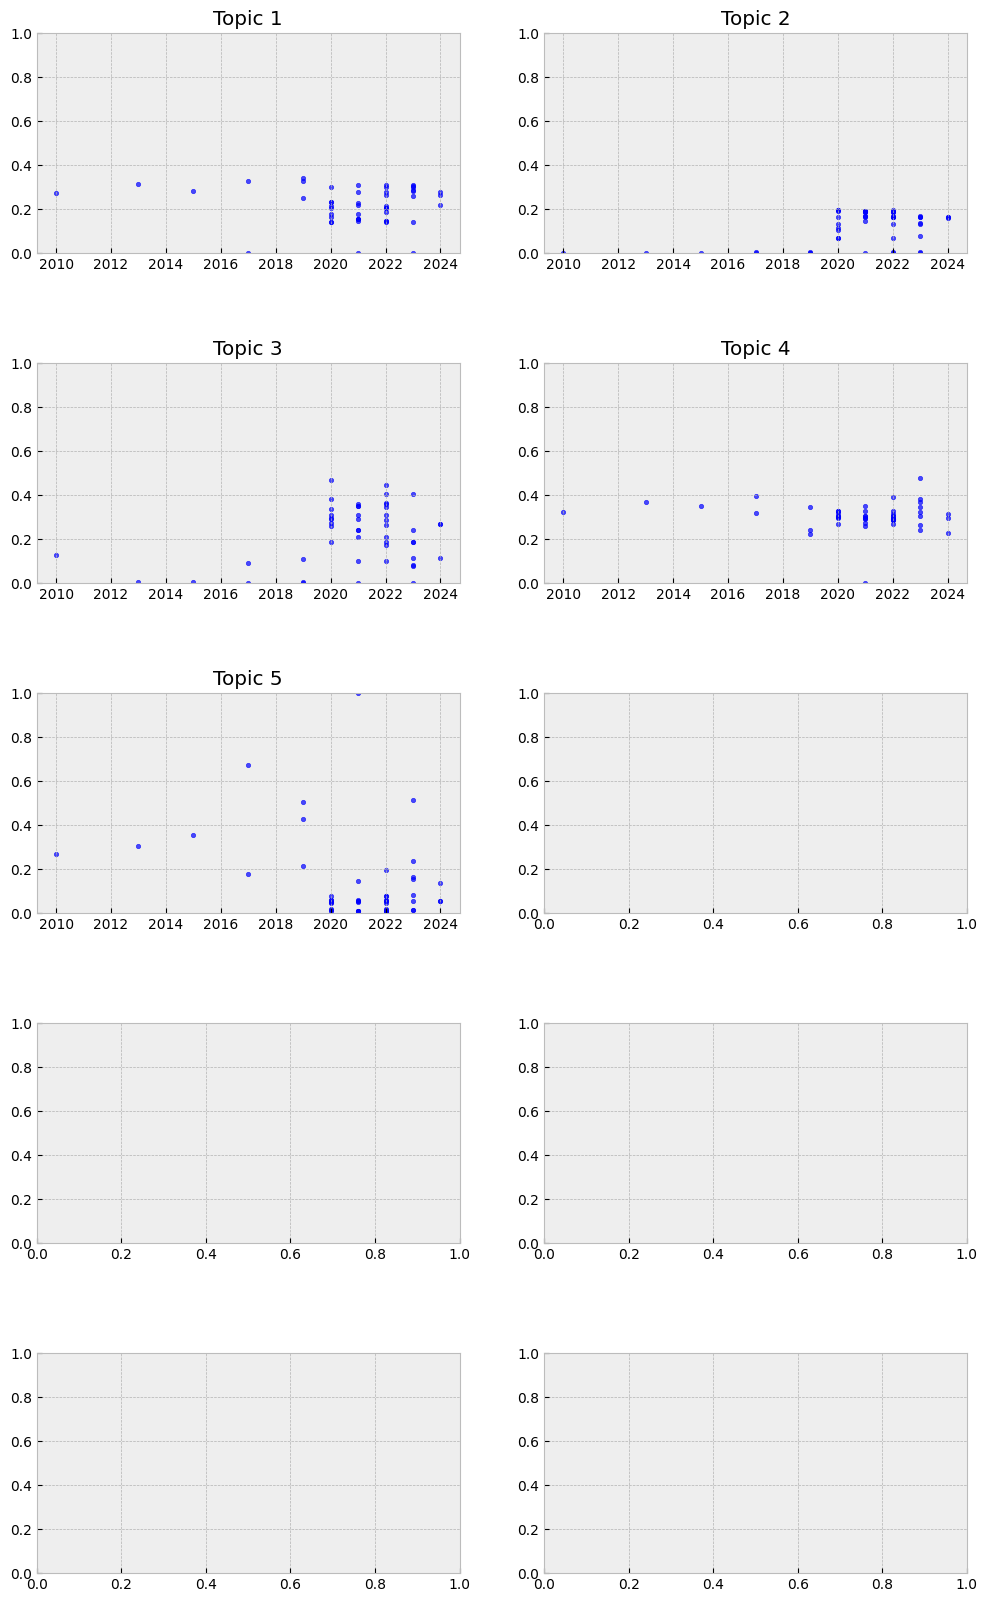

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 2, figsize=(12, 20), squeeze=True)
topics = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']

for ax, topic in zip(axs.flat, topics):
    ax.scatter(evolution_df.index, evolution_df[topic].rolling(16, min_periods=1).mean(), s=10, c='blue', alpha=0.7)
    ax.set_title(topic)
    ax.set_ylim([0, 1])

plt.subplots_adjust(hspace=0.5)
plt.savefig('scatter_plots.png')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


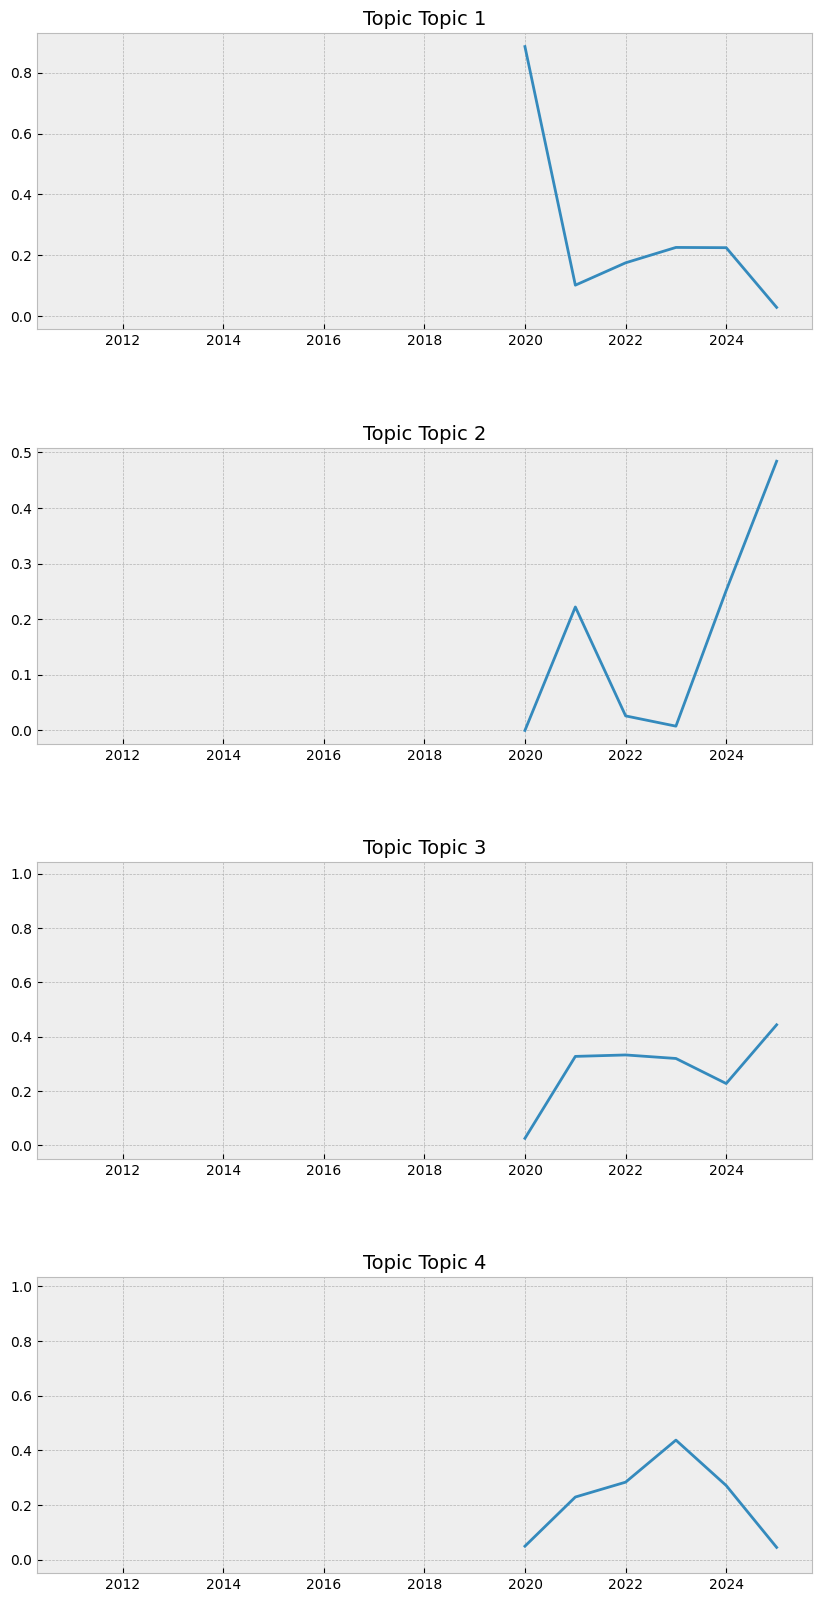

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=[10, 20])

selected_topics = evolution_df.columns[:4]
for ax, topic in zip(axs.flat, selected_topics):
    ax.plot(evolution_df.resample('Y').mean()[topic])
    ax.set_title('Topic ' + topic, {'fontsize': 14})

plt.subplots_adjust(hspace=0.4)

plt.savefig('topic_trends.png', facecolor='white')

In [ ]:
evolution_df.groupby('Date').mean() #grouping the topics my dates and mean interest for a specific year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Date,,,,,
2010-01-01,0.000000,0.000000,0.992525,0.000000,0.000000
2013-01-01,0.495927,0.000000,0.000000,0.503933,0.000000
2015-01-01,0.000000,0.000000,0.000000,0.984410,0.000000
2017-01-01,0.263497,0.000000,0.000000,0.231455,0.499505
2019-01-01,0.886155,0.000000,0.024778,0.049371,0.039347
2020-01-01,0.100948,0.221897,0.326875,0.229090,0.118062
2021-01-01,0.174533,0.026143,0.332196,0.283493,0.180933
2022-01-01,0.225134,0.007707,0.319199,0.437169,0.009593
2023-01-01,0.224292,0.251554,0.226838,0.271028,0.025477


In [ ]:
top_words_df = pd.DataFrame()
for i in range(4):
    top_words_df['Topic ' + str(i+1)] = [item[0] for item in lda_model.show_topic(i,4)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Solve the optimal number of topics
coh_list = []
perp_list = []
for i in range(20):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=i+2,random_state=10,update_every=1,chunksize=len(corpus)/3,passes=10,alpha='auto',per_word_topics=False,eta='auto')
    coherence_model_lda = CoherenceModel(model=lda_model, texts = docs_bigrams,corpus=corpus, dictionary=id2word, coherence='u_mass')
    coh_list.append(coherence_model_lda.get_coherence())
    perp_list.append(lda_model.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coh_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.45259696280468514,
 -0.489678957345738,
 -0.5632987234438909,
 -0.49087124750772587,
 -0.7817305377525899,
 -0.4604612980087519,
 -0.48672933689399744,
 -0.47702651543911134,
 -0.6367819531958767,
 -0.4864986747479083,
 -0.6374277049636852,
 -0.5312461648035938,
 -0.6711844515390287,
 -0.7532289598262606,
 -0.4787855518409506,
 -0.5861210436857468,
 -0.4704035660249672,
 -0.4604762852960047,
 -0.6107654323529463,
 -0.42185485289201163]

In [ ]:
perp_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-7.324450395681525,
 -7.289038142907045,
 -7.294353341393188,
 -7.259562271955698,
 -7.24433004458649,
 -7.271560491696327,
 -7.270388897140658,
 -7.255098366961316,
 -7.258972031661101,
 -7.267235098662413,
 -7.309557336311644,
 -7.382573199902984,
 -7.443698328562218,
 -7.475201232673175,
 -7.503212063495588,
 -7.559339400696538,
 -7.578478503226674,
 -7.570810842680369,
 -7.622855149300811,
 -7.664090774083891]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


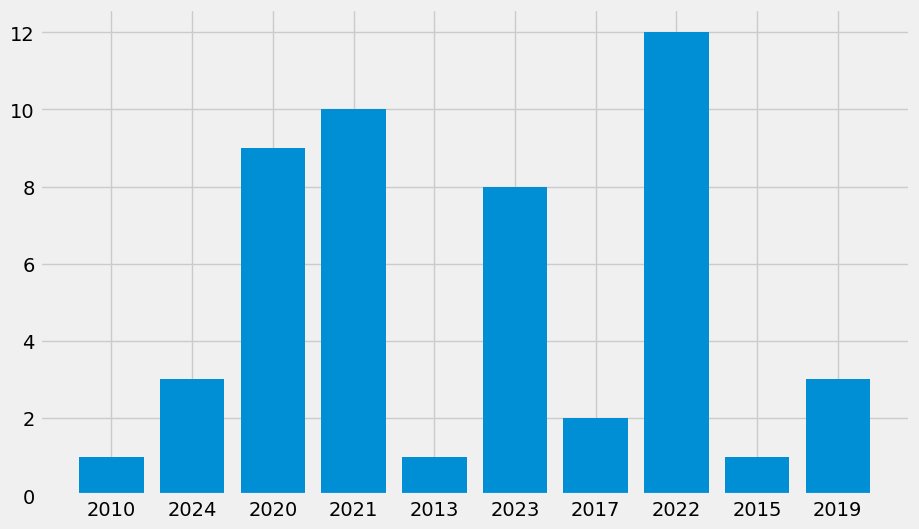

In [ ]:
plt.style.use('fivethirtyeight') # Define the style of figures.
plt.figure(figsize=[10,6]) # Define the size of figures.
# The first argument: years, the second argument: the list of document frequencies for different years (built using list comprehension)
plt.bar(list(set(file_years)),[file_years.count(a) for a in set(file_years)])
plt.xticks(list(set(file_years))) # The years below the bars
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


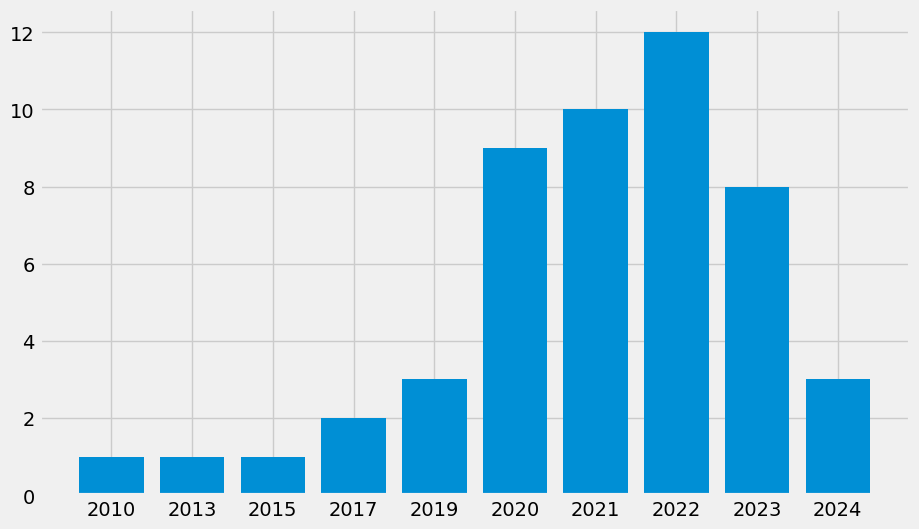

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')  # Define the style of figures.
plt.figure(figsize=[10, 6])  # Define the size of figures.

# Sort the unique years in chronological order
unique_years = sorted(set(file_years))

# The first argument: years, the second argument: the list of document frequencies for different years
plt.bar(unique_years, [file_years.count(year) for year in unique_years])

plt.xticks(unique_years)  # The years below the bars

plt.show()


**Chapter 2: Prediction models**

Data from the Taiwan Economic Journal for the years 1999–2009 representing company bankruptcy based on the business regulations of the Taiwan Stock Exchange (source: Kaggle.com, https://www.kaggle.com/code/marto24/bankruptcy-detection/input)

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA




import xgboost as XGB


from imblearn.over_sampling import SMOTE

import warnings

#Ignore warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv('/content/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<Axes: >

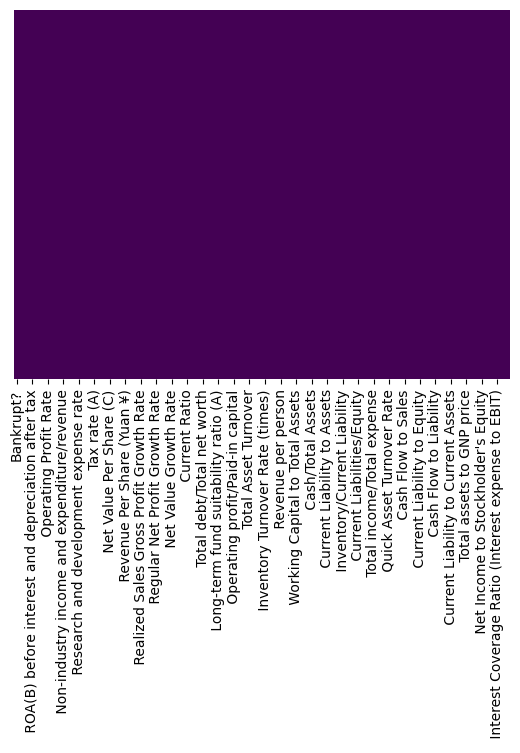

In [ ]:
#check any Nan data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

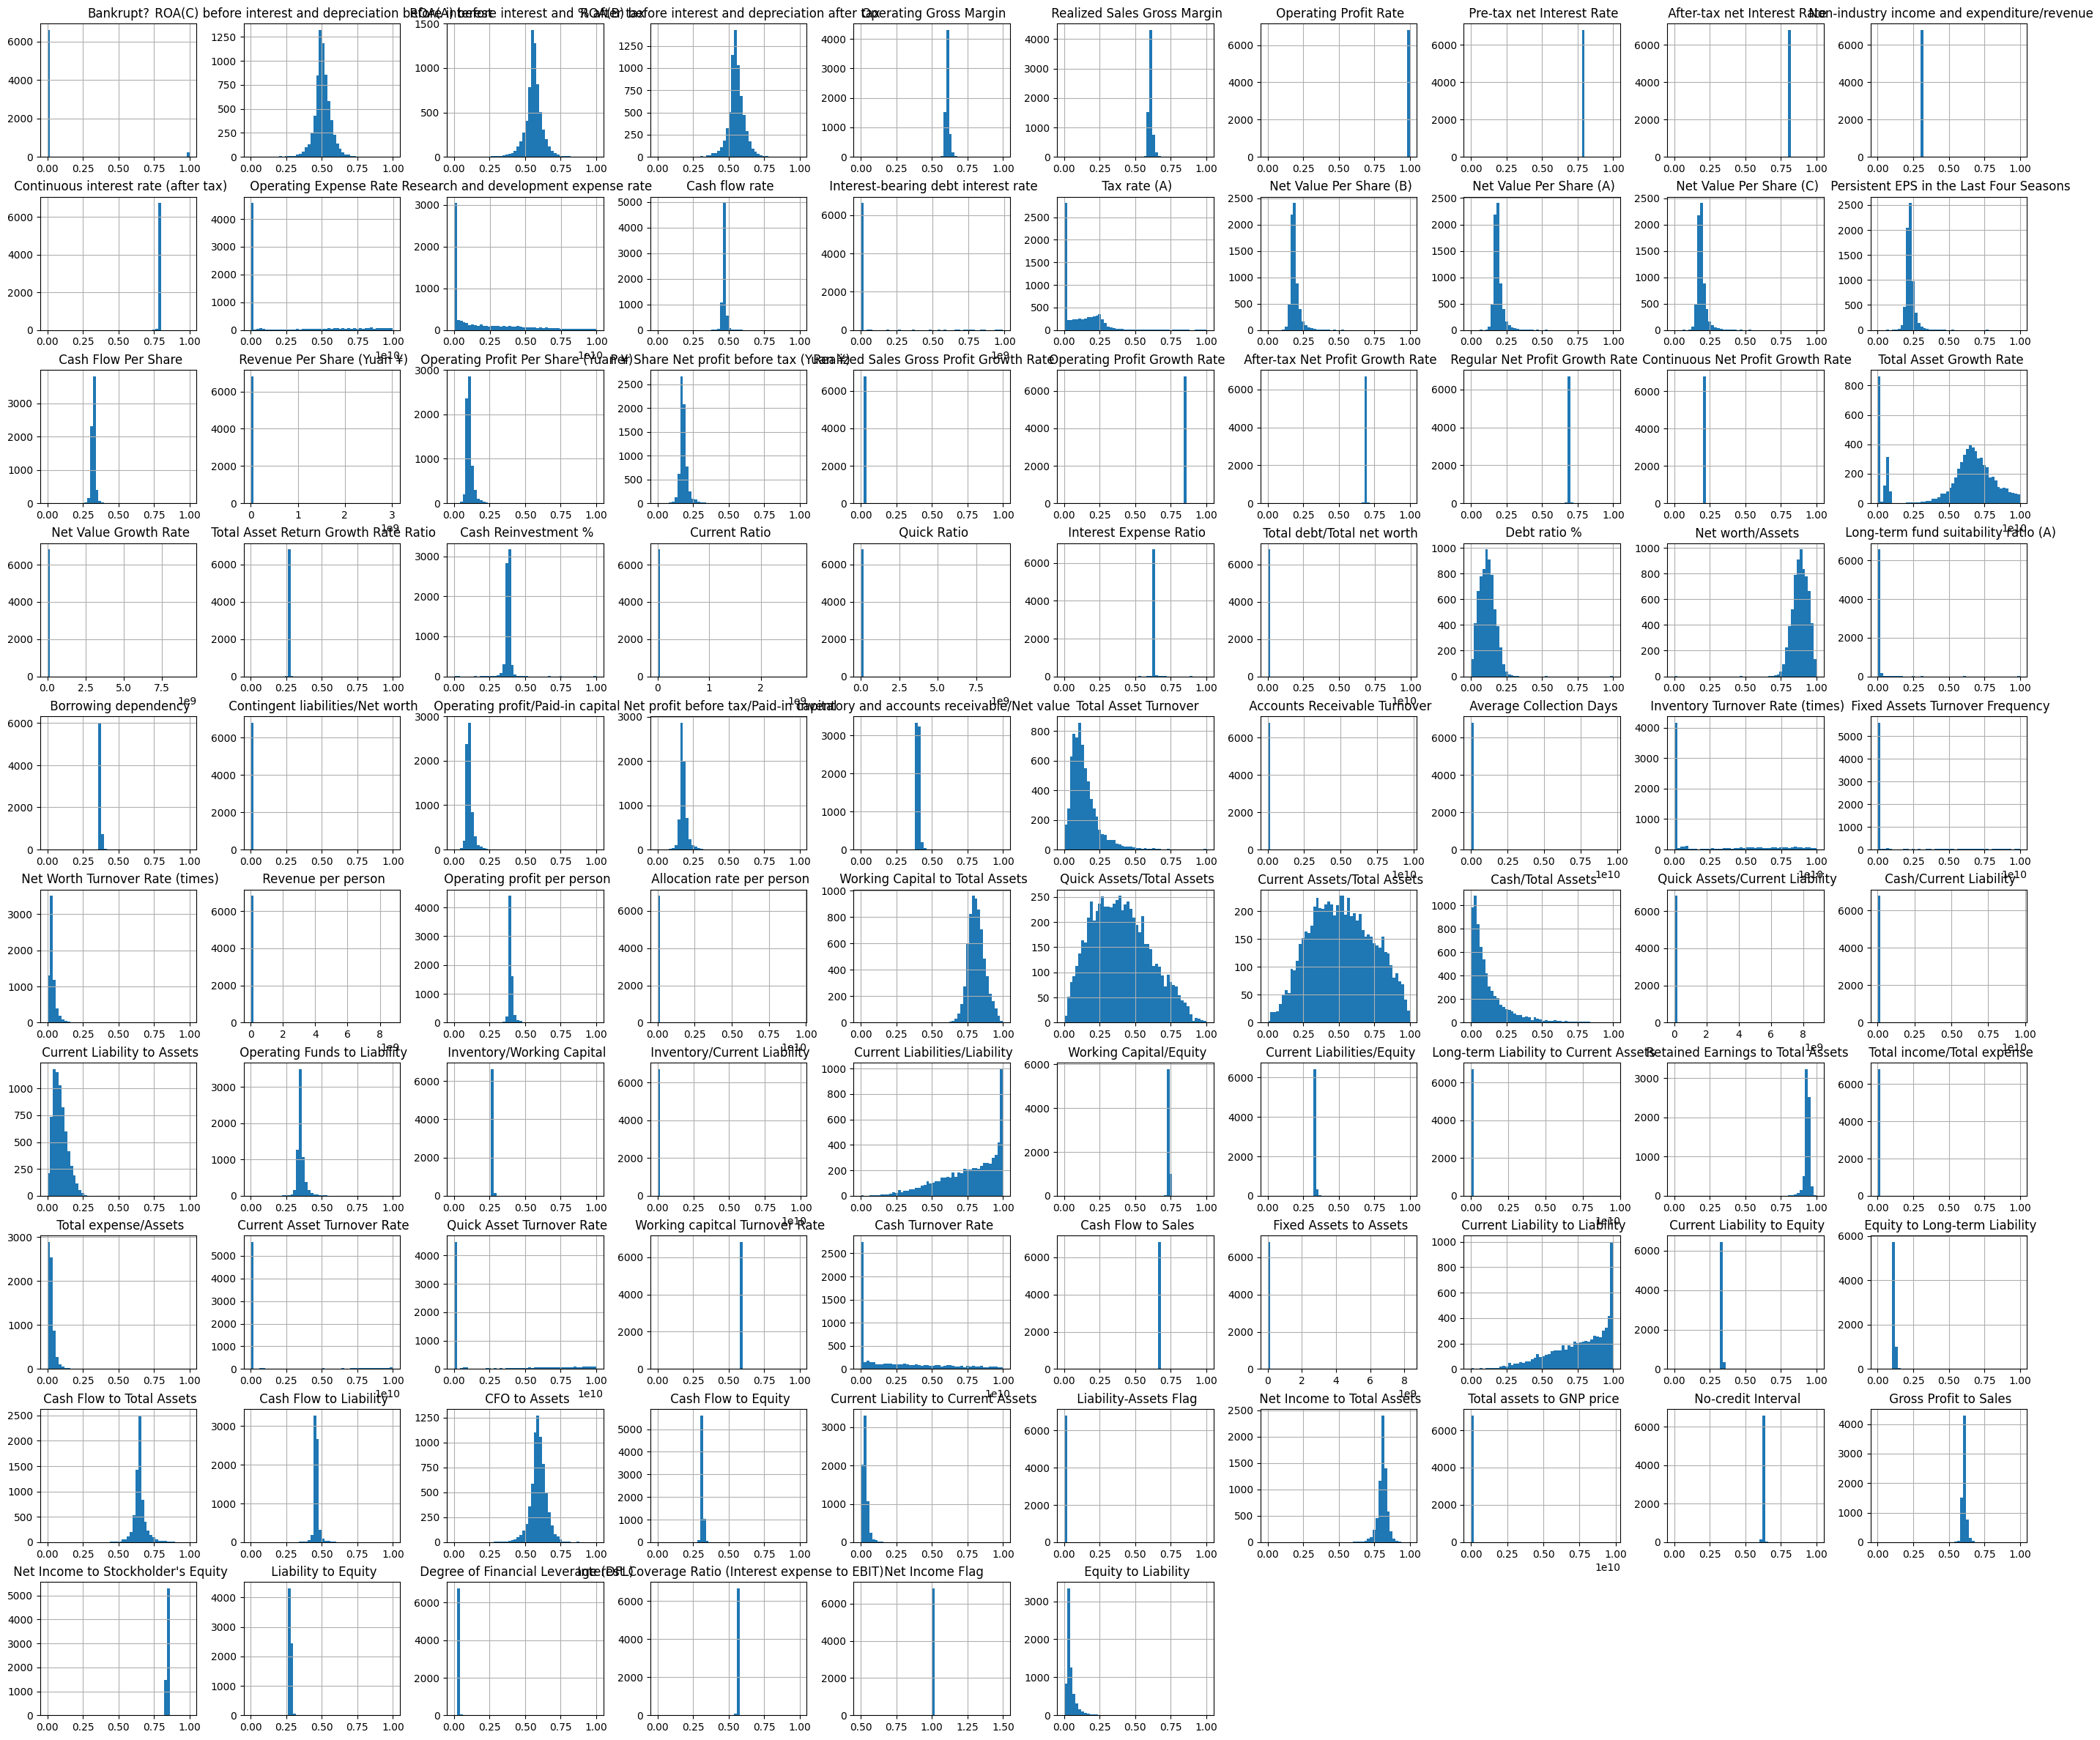

In [ ]:
data.hist(figsize = (35,30), bins = 50)
plt.show()

<Axes: >

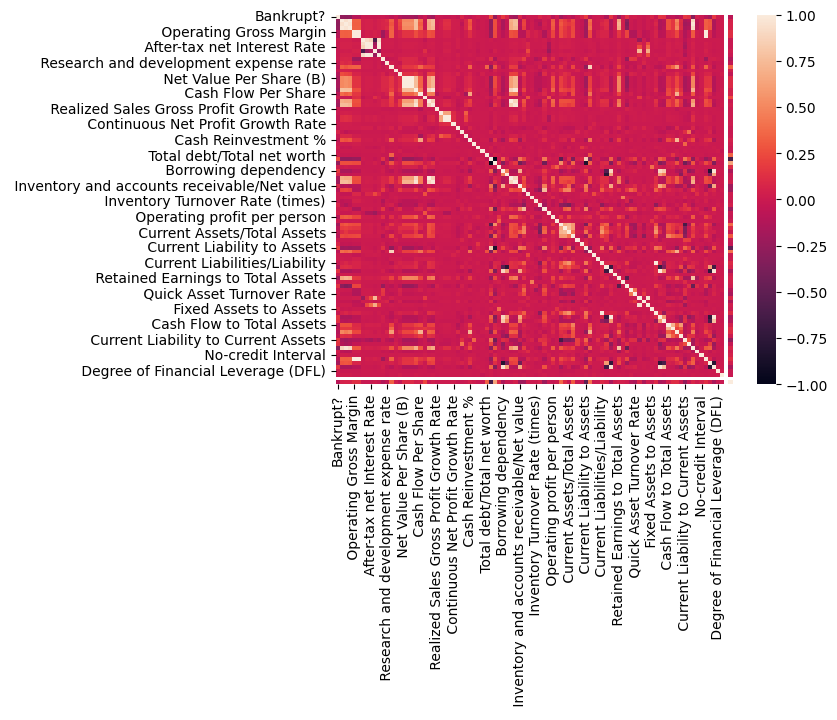

In [ ]:
sns.heatmap(data.corr())

In [ ]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

the correlation map show there are many variables that are multicollinear

Data Preprocessing and Train-Test Data Split

In [ ]:
#from the descriptive data, we can see 'Net Income Flag' is a single data, so we will remove this variable
data = data.drop(' Net Income Flag', axis=1)

In [ ]:
def preprocess_inputs(data):
    data = data.copy()


    # Split df into X and y
    y = data['Bankrupt?']
    X = data.drop('Bankrupt?', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

For the bankruptcy prediction, we used 6 models and compare their performance: Logistic regression, Support Vector Machine ,Artificial Neural Networks, Random Forest, Gradient Boosting,XgBoost Classifier

In [ ]:
original_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.5),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "XgBoost Classifier": XGB.XGBClassifier()
}

for name, model in original_models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.
XgBoost Classifier trained.


In [ ]:
original_results = []

for name, model in original_models.items():
  result = model.score(X_test, y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = original_models[name]
  y_test_pred = model.predict(X_test)
  arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[1306    8]
 [  42    8]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1314
           1       0.50      0.16      0.24        50

    accuracy                           0.96      1364
   macro avg       0.73      0.58      0.61      1364
weighted avg       0.95      0.96      0.95      1364

Logistic Regression: 96.33431%

  __________________________Support Vector Machine (RBF Kernel)__________________________
  
[[1314    0]
 [  49    1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       1.00      0.02      0.04        50

    accuracy                           0.96      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.97      0.96      0.95      1364

Support Vector Machine (RBF Kernel): 96.40762%

  __________________________Neural Networ

The original data gives the result that Neural Network, Gradient Boosting and Xgboost models have the highest accuracy rate in bankruptcy prediction

Logistic Regression: 96.33431%
Support Vector Machine (RBF Kernel): 96.40762%
Neural Network: 95.38123%
Random Forest: 96.55425%
Gradient Boosting: 96.55425%
XgBoost Classifier: 96.55425%


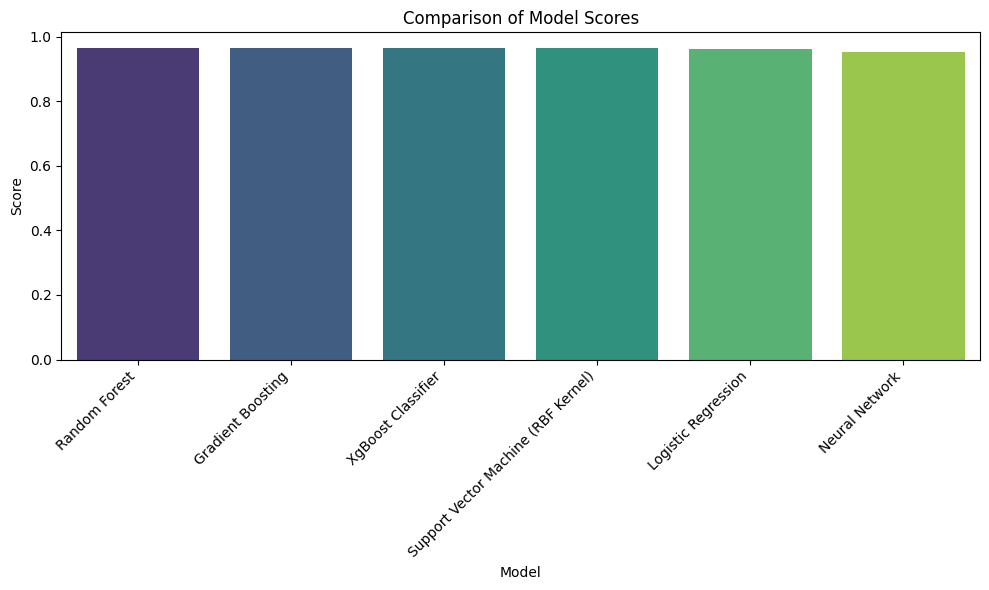

In [ ]:
# Create an empty list to store the results
original_results = []

# Populate the list with tuples containing the model names and scores
for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append((name, result))
    print(f"{name}: {result * 100:.5f}%")

# Convert the list of tuples to a DataFrame
dt = pd.DataFrame(original_results, columns=["Model", "Score"])

# Sort the DataFrame by scores in descending order
dt = dt.sort_values("Score", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", data=dt, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Model Scores")
plt.tight_layout()
plt.show()

*CHECK THE BALANCED CLASSIFICATION***

<Axes: xlabel='Bankrupt?'>

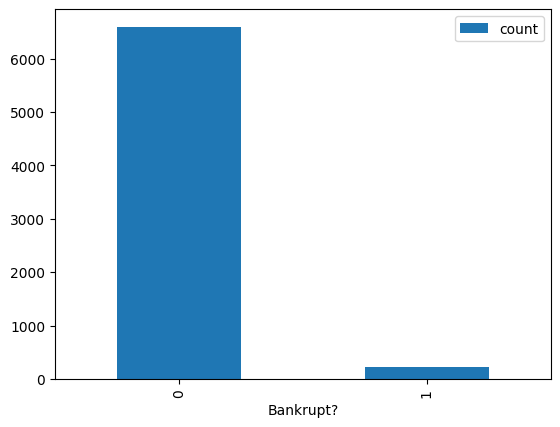

In [ ]:
data['Bankrupt?'].value_counts().plot(kind='bar',legend=True)

There is imbalance in the Target value, we need to oversample it based

In [ ]:
#define y and X variables
X= data.drop(columns='Bankrupt?')
y=data['Bankrupt?']

In [ ]:
#Oversampling the Target vaiable using SMOTE
oversample = SMOTE()
X_smote,y_smote=oversample.fit_resample(X,y)

<Axes: xlabel='Bankrupt?', ylabel='count'>

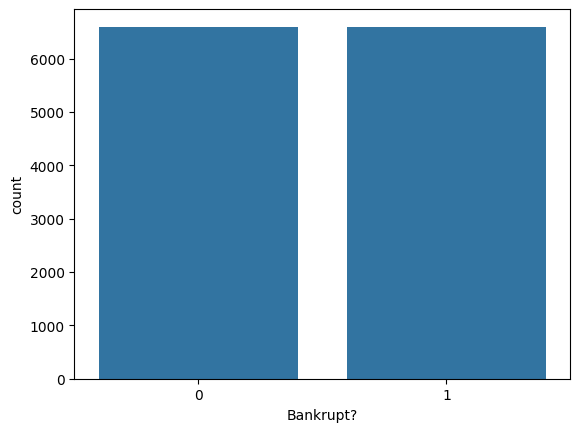

In [ ]:
sns.countplot(x=y_smote)

In [ ]:
#Standardize the Independent Variable
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_smote)

In [ ]:
X_smote_train, X_smote_test , y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)

In [ ]:
smote_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.5),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "XgBoost Classifier": XGB.XGBClassifier()
}

for name, model in smote_models.items():
  model.fit(X_smote_train, y_smote_train)
  print(name + ' trained.')

Logistic Regression trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.
XgBoost Classifier trained.


In [ ]:
smote_results = []

for name, model in smote_models.items():
  result = model.score(X_smote_test, y_smote_test)
  smote_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = smote_models[name]
  y_smote_test_pred = model.predict(X_smote_test)
  arg_test = {'y_true':y_smote_test, 'y_pred':y_smote_test_pred}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[994 349]
 [675 622]]
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1343
           1       0.64      0.48      0.55      1297

    accuracy                           0.61      2640
   macro avg       0.62      0.61      0.60      2640
weighted avg       0.62      0.61      0.61      2640

Logistic Regression: 61.21212%

  __________________________Support Vector Machine (RBF Kernel)__________________________
  
[[1033  310]
 [ 153 1144]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1343
           1       0.79      0.88      0.83      1297

    accuracy                           0.82      2640
   macro avg       0.83      0.83      0.82      2640
weighted avg       0.83      0.82      0.82      2640

Support Vector Machine (RBF Kernel): 82.46212%

  __________________________Neural Network___

after resampling the inputs, the accuracy rate of Random forest, xgboost increase, while others decrease

Logistic Regression: 61.21212%
Support Vector Machine (RBF Kernel): 82.46212%
Neural Network: 83.06818%
Random Forest: 97.91667%
Gradient Boosting: 96.13636%
XgBoost Classifier: 98.75000%


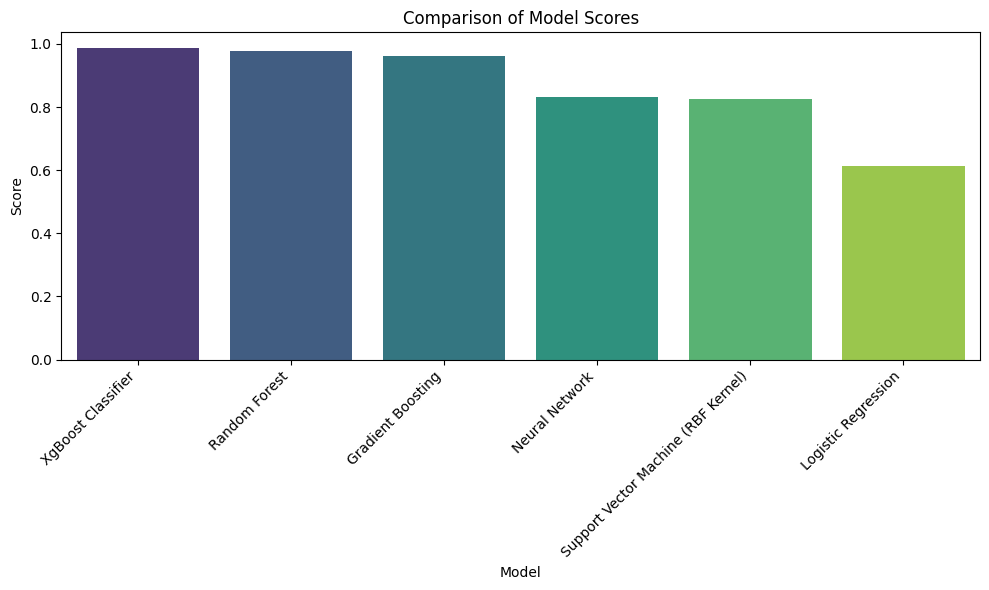

In [ ]:

# Create an empty list to store the results
results = []

# Populate the list with tuples containing the model names and scores
for name, model in smote_models.items():
    result = model.score(X_smote_test, y_smote_test)
    results.append((name, result))
    print(f"{name}: {result * 100:.5f}%")

# Convert the list of tuples to a DataFrame
dt = pd.DataFrame(results, columns=["Model", "Score"])

# Sort the DataFrame by scores in descending order
dt = dt.sort_values("Score", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", data=dt, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Model Scores")
plt.tight_layout()
plt.show()

**ROC CURVE**

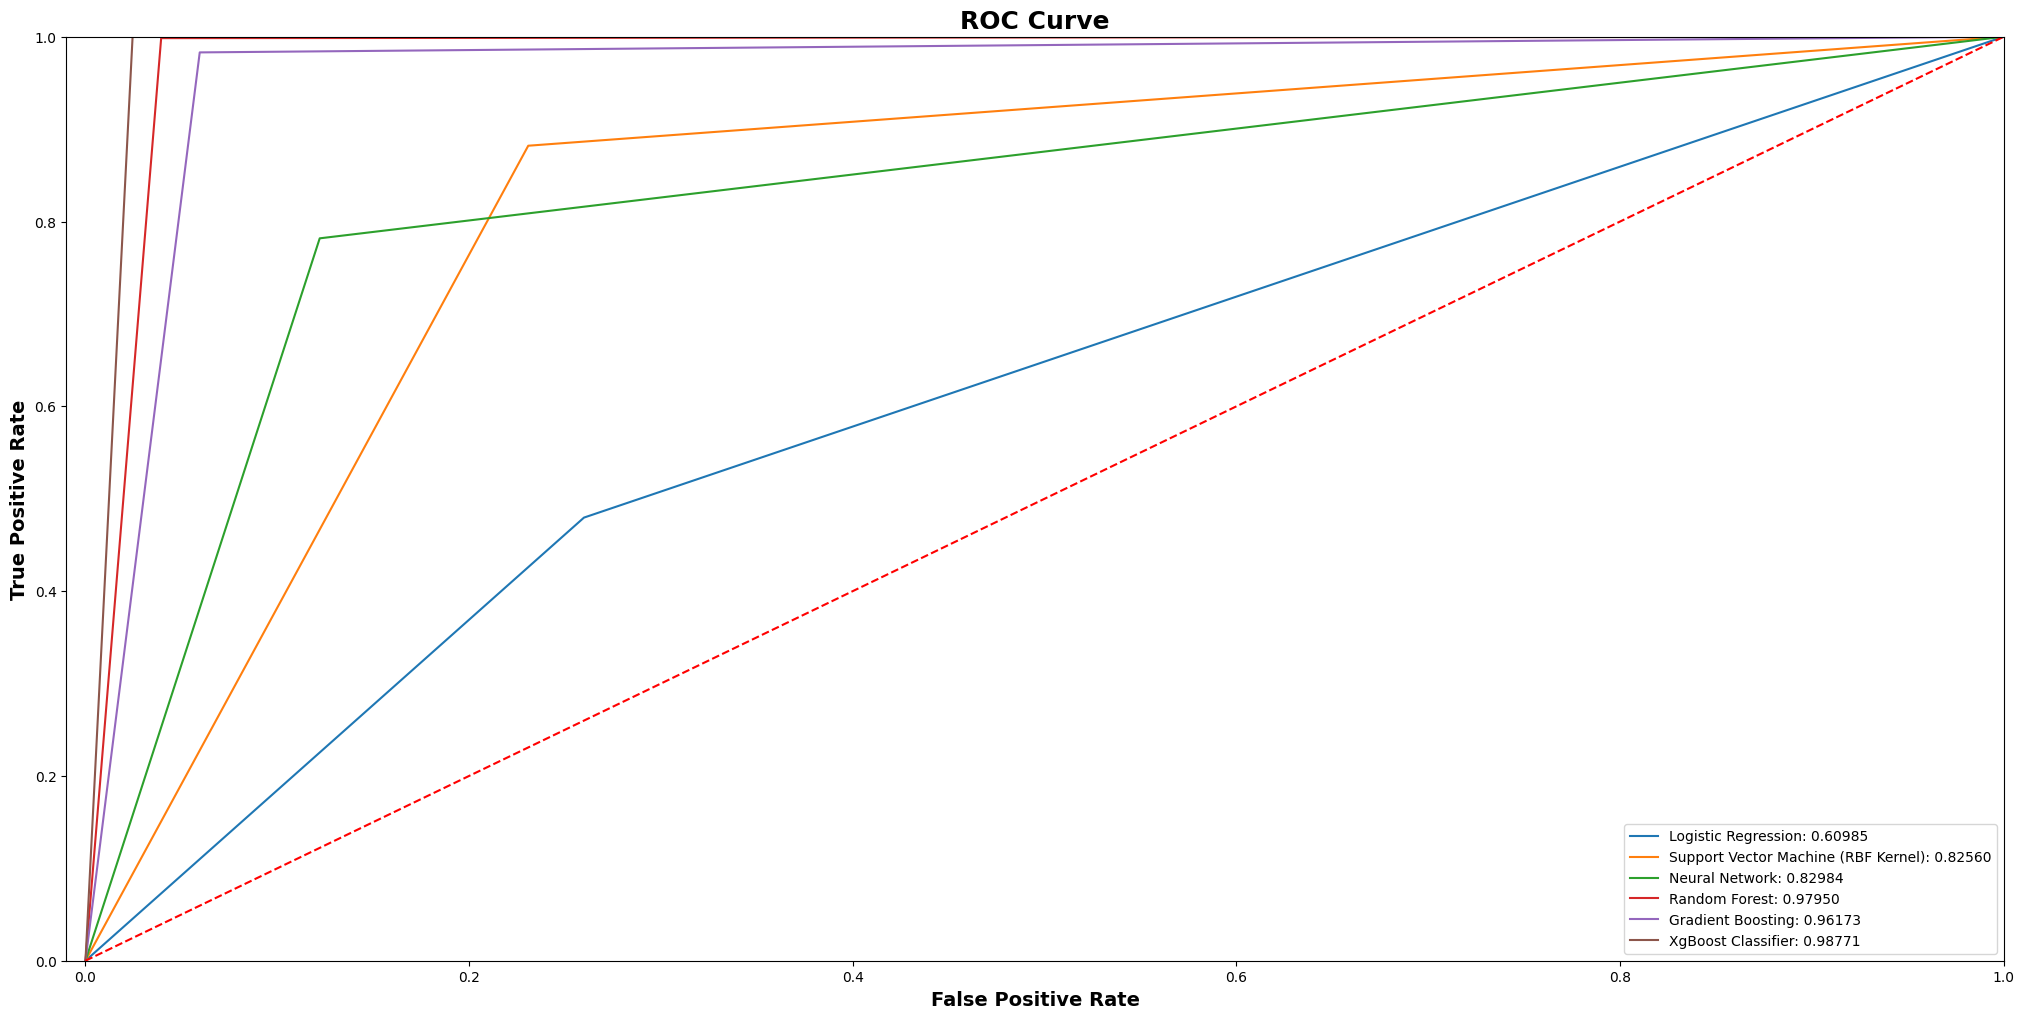

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25,12)

for m in smote_models:
    y_pred = smote_models[m].predict(X_smote_test)
    fpr, tpr, thresholds_nb = roc_curve(y_smote_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_smote_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= m + ': {:.5f}'.format(roc_auc_score(y_smote_test, y_pred)))
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

**FEATURE IMPORTANCE ANALYSIS**

In [ ]:
#SHAP ANALYSIS
import os
import shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
j=0
shap.initjs()

In [ ]:
import xgboost
# Winsorize x-data
X_wins = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis = 1)
dtrain = xgboost.DMatrix(X_wins, label=y, nthread = -1)

In [ ]:
m_depth = 5
eta = 0.02
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0.1
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample, 'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam}

In [ ]:
temp = xgboost.cv(param,dtrain,num_boost_round=900,nfold=5,seed=10)

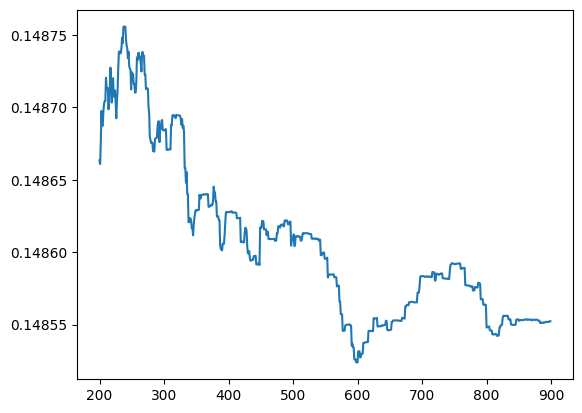

In [ ]:
plt.plot(temp['test-rmse-mean'][200:900])
plt.show()

In [ ]:
#set the tree number equal to 520
b_rounds = 520

In [ ]:
bst = xgboost.train(param,dtrain,num_boost_round=b_rounds)

In [ ]:
explainerXGB = shap.TreeExplainer(bst)
shap_values_XGB = explainerXGB.shap_values(X_wins,y,check_additivity = False)

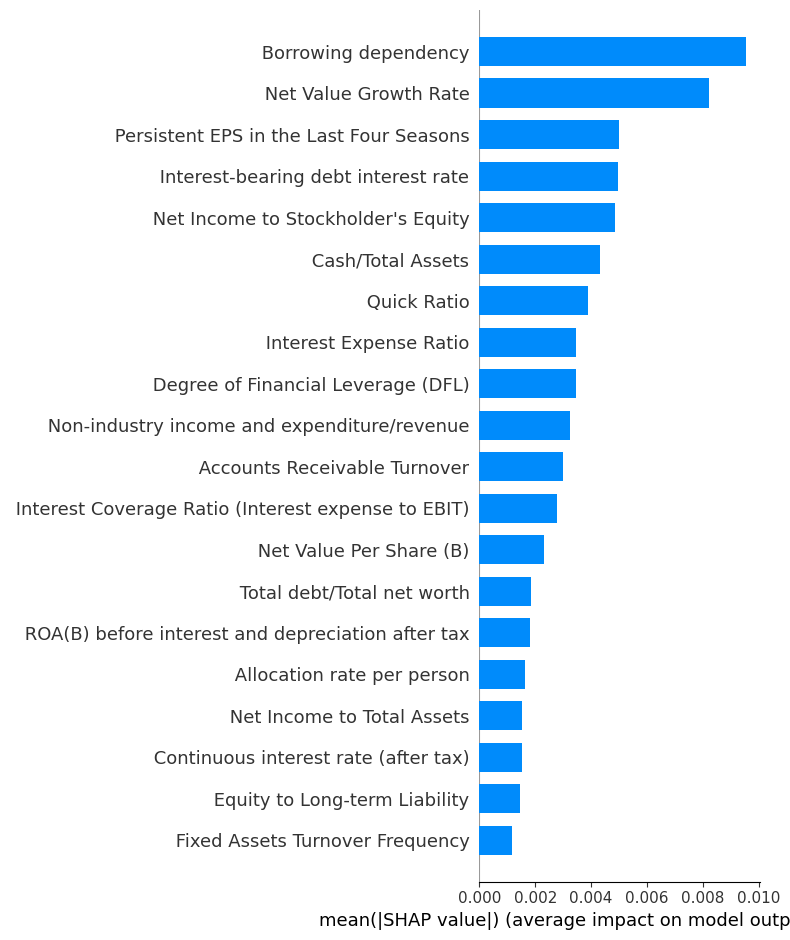

In [ ]:
shap.summary_plot(shap_values_XGB,X_wins,plot_type='bar')

In [ ]:
#Present the average values as a dataframe.
shaps = np.mean(abs(shap_values_XGB), axis = 0)
names = bst.feature_names
apu_df = pd.DataFrame()
apu_df['names'] = names
apu_df['shaps'] = shaps
apu_df

,names,shaps
0,ROA(C) before interest and depreciation befor...,0.001085
1,ROA(A) before interest and % after tax,0.000580
2,ROA(B) before interest and depreciation after...,0.001803
3,Operating Gross Margin,0.000508
4,Realized Sales Gross Margin,0.000257
...,...,...
89,Net Income to Stockholder's Equity,0.004845
90,Liability to Equity,0.000507
91,Degree of Financial Leverage (DFL),0.003461
92,Interest Coverage Ratio (Interest expense to ...,0.002770


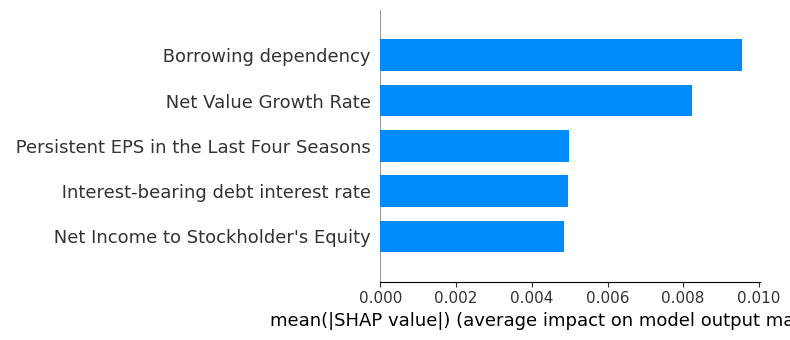

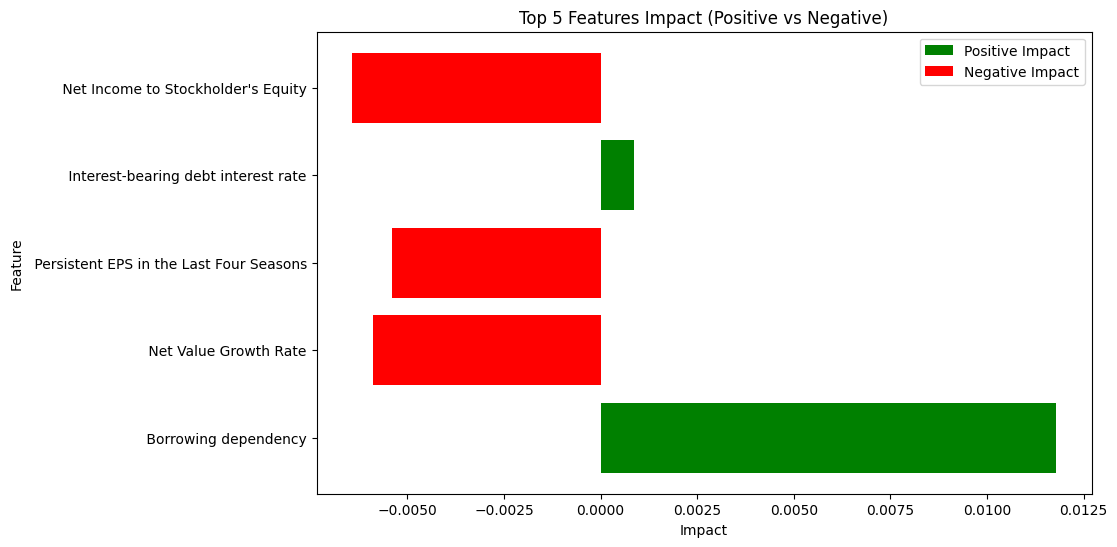

In [ ]:
# Calculate the mean absolute SHAP values for each feature
shap_values_abs_mean = np.abs(shap_values_XGB).mean(axis=0)

# Get the indices of the top 5 features
top5_indices = np.argsort(-shap_values_abs_mean)[:5]

# Get the names of the top 5 features
top5_features = X_wins.columns[top5_indices]

# Plot the SHAP summary plot for the top 5 features
shap.summary_plot(shap_values_XGB, X_wins, plot_type='bar', feature_names=X_wins.columns, max_display=5)

# Calculate standardized features
stand_feats = (X_wins - X_wins.mean(axis=0)) / X_wins.std(axis=0)

# Multiply SHAP values by standardized features
std_feat_times_shaps = np.multiply(shap_values_XGB, stand_feats)

# Calculate the mean of multiplied SHAP values
dir_metric = np.mean(std_feat_times_shaps, axis=0)

# Determine positive and negative contributions
positive_contributions = np.maximum(0, dir_metric[top5_indices])
negative_contributions = np.minimum(0, dir_metric[top5_indices])

# Plot the horizontal bar chart for the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top5_features)), positive_contributions, color='green', label='Positive Impact')
plt.barh(range(len(top5_features)), negative_contributions, color='red', label='Negative Impact')
plt.yticks(range(len(top5_features)), top5_features)
plt.xlabel('Impact')
plt.ylabel('Feature')
plt.legend()
plt.title('Top 5 Features Impact (Positive vs Negative)')
plt.show()
